<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

Decision Tree Regression

This Code template is for regression analysis using simple DecisionTreeRegressor based on the Classification and Regression Trees algorithm.

### Required Packages

In [24]:
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [25]:
file_path= ""

List of features which are  required for model training .

In [26]:
features=[]


Target feature for prediction.

In [27]:
target=''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [28]:
df=pd.read_csv(file_path);
df.head()

,Unnamed: 0,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [29]:
X=df[features]
Y=df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [30]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.


In [31]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

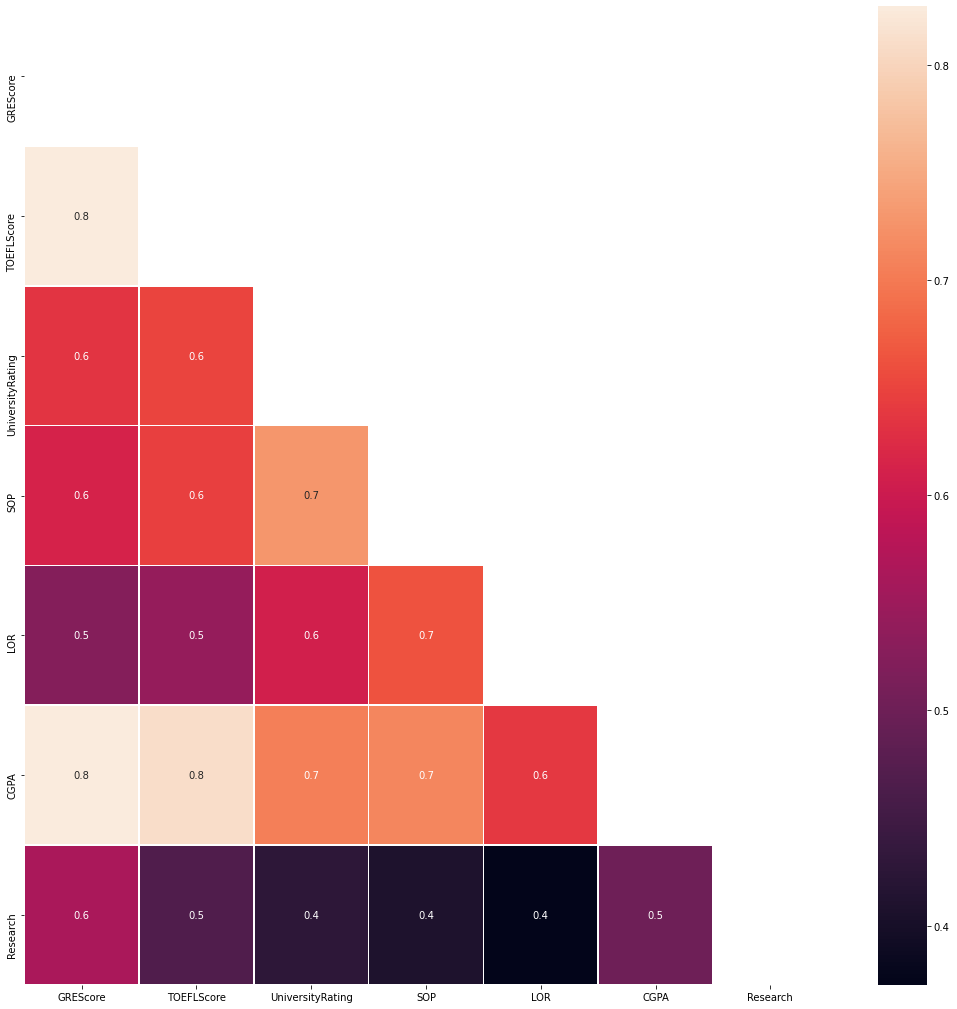

In [32]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)#plotting correlation matrix
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Model
 Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a outcome label.

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values

#### Model Tuning Parameter

>    - criterion ->  The function to measure the quality of a split. Supported criteria are “mse for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse, which uses mean squared error with Friedman’s improvement score for potential splits, “mae for the mean absolute error, which minimizes the L1 loss using the median of each terminal node, and “poisson which uses reduction in Poisson deviance to find splits.

>    - max_depth -> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

>    - max_leaf -> Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

>    - max_features -> The number of features to consider when looking for the best split: **{auto , sqrt, log2}**

In [34]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(x_train,y_train)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

The model score function computes the accuracy, either the fraction or the count of correct predictions.
> **score**: The **score** function returns the coefficient of determination <code>R<sup>2</sup></code> of the prediction.

In [35]:
print("Accuracy on test: {:.2f} %".format(model.score(x_test, y_test)*100))

Accuracy on test: 60.10 %


> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [36]:
y_pred = model.predict(x_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 60.10%
Mean Absolute Error 0.06
Mean Squared Error 0.01


#### Feature Importances

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.

(-1.0, 7.0)

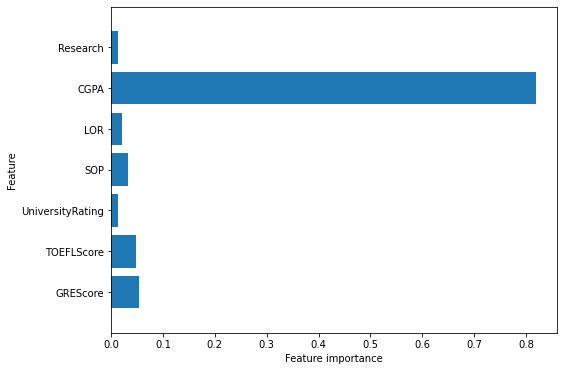

In [37]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

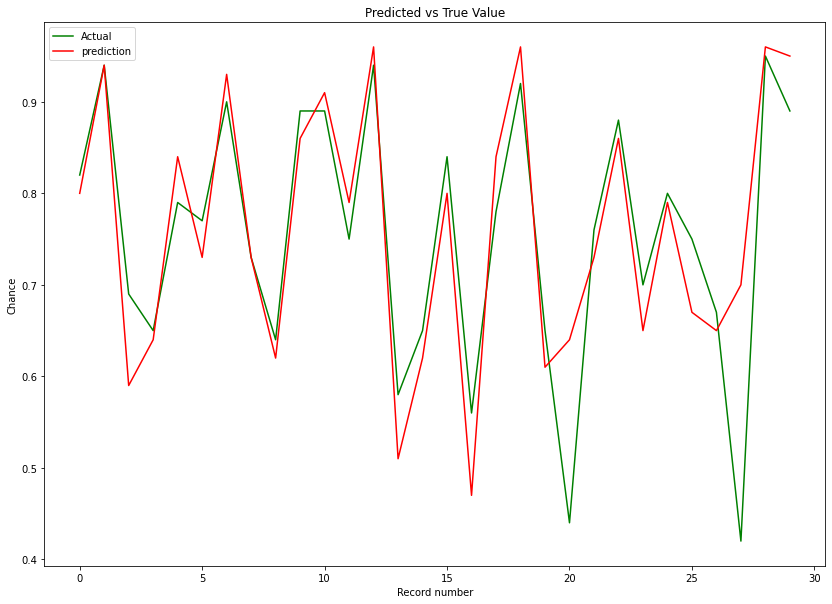

In [38]:
plt.figure(figsize=(14,10))
plt.plot(range(30),y_test[0:30], color = "green")
plt.plot(range(30),y_pred[0:30], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Tree Plot

Plot a decision tree.The visualization is fit automatically to the size of the axis. Use the figsize or dpi arguments of plt.figure to control the size of the rendering.

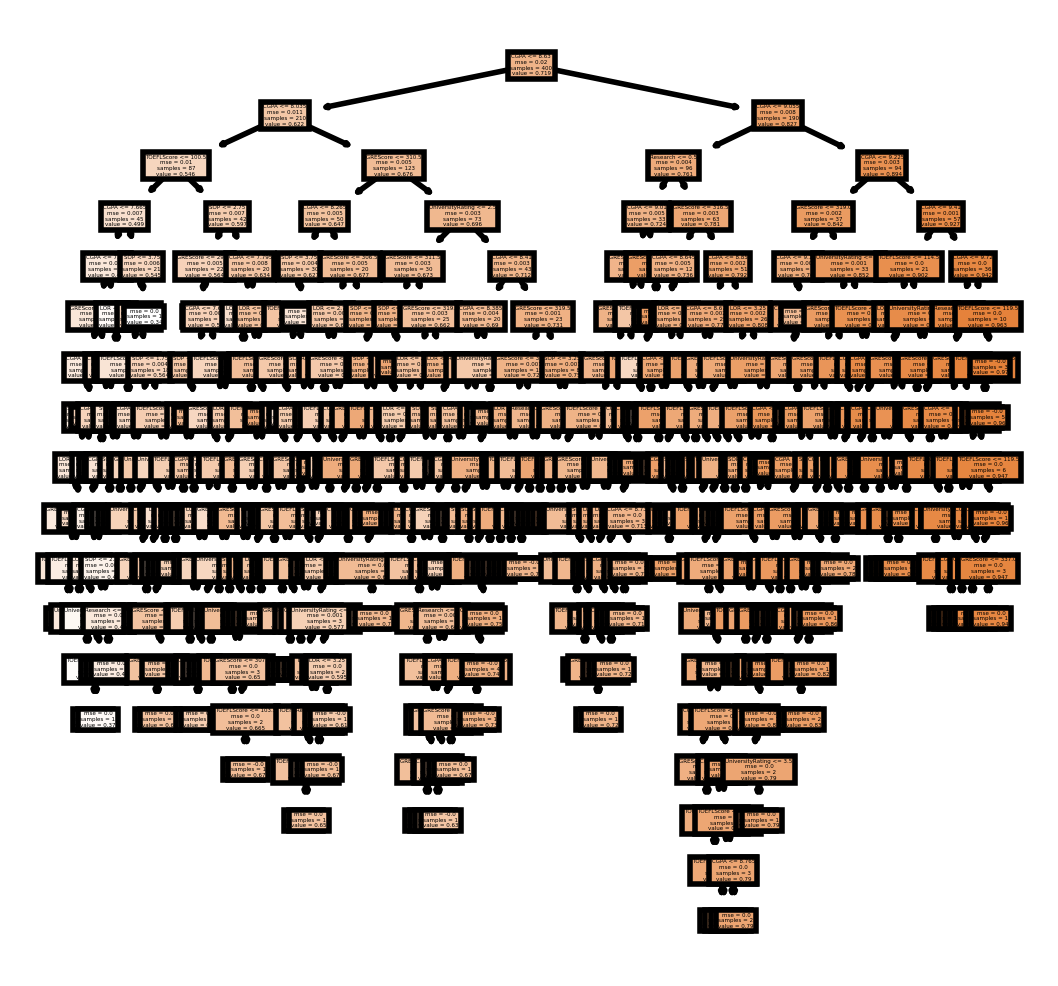

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=400)
cls_target = [str(x) for x in pd.unique(y_train)]
cls_target.sort()
plot_tree(model,feature_names = X.columns, class_names=cls_target,filled = True)
fig.savefig('./tree.png')

#### Creator: Thilakraj Devadiga , Github: [Profile](https://github.com/Thilakraj1998)
